# Import Libraries and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Files

In [2]:
data1 = pd.read_csv('data/rfm_customer_data.csv')
data2 = pd.read_csv('data/data.csv')

In [3]:
data1.head()

customer_id  recency  frequency  monetary
0            1        7         11   3018.09
1            2      128          3   2226.26
2            4      195          2    220.57
3            5       16          6   2394.94
4            6       64          5   3946.55

In [4]:
data2.head()

customer_id    score segmentation  gender               job_title  \
0            1  Diamond        Loyal  Female     Executive Secretary   
1            2   Bronze     Slipping    Male  Administrative Officer   
2            4   Bronze      Dormant    Male      Recruiting Manager   
3            5   Silver    Promising  Female           Senior Editor   
4            6   Silver       Whales    Male           Senior Editor   

  job_industry_category     wealth_segment owns_car  tenure age_class state  \
0                Health      Mass Customer      Yes      11     70-79   NSW   
1    Financial Services      Mass Customer      Yes      16     40-49   NSW   
2                    IT      Mass Customer       No       7     60-69   QLD   
3                    IT  Affluent Customer      Yes       8     40-49   NSW   
4                Retail     High Net Worth      Yes      13     50-59   VIC   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [5]:
df_merged = pd.merge(data1, data2, on = 'customer_id')
df_merged.head()

customer_id  recency  frequency  monetary    score segmentation  gender  \
0            1        7         11   3018.09  Diamond        Loyal  Female   
1            2      128          3   2226.26   Bronze     Slipping    Male   
2            4      195          2    220.57   Bronze      Dormant    Male   
3            5       16          6   2394.94   Silver    Promising  Female   
4            6       64          5   3946.55   Silver       Whales    Male   

                job_title job_industry_category     wealth_segment owns_car  \
0     Executive Secretary                Health      Mass Customer      Yes   
1  Administrative Officer    Financial Services      Mass Customer      Yes   
2      Recruiting Manager                    IT      Mass Customer       No   
3           Senior Editor                    IT  Affluent Customer      Yes   
4           Senior Editor                Retail     High Net Worth      Yes   

   tenure age_class state  property_valuation  
0      11     70-79   NSW                  10  
1      16     40-49   NSW                  10  
2       7     60-69   QLD                   9  
3       8     40-49   NSW                   4  
4      13     50-59   VIC                   9

In [6]:
df_merged.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'score',
       'segmentation', 'gender', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age_class', 'state',
       'property_valuation'],
      dtype='object')

In [7]:
selected_column = ['customer_id', 'gender', 'job_title', 'job_industry_category',
                   'wealth_segment', 'owns_car', 'tenure', 'age_class', 'state', 
                   'property_valuation','recency', 'frequency', 'monetary']
df = df_merged[selected_column]

In [8]:
df_ori = df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 0 to 3485
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3486 non-null   int64  
 1   gender                 3486 non-null   object 
 2   job_title              3486 non-null   object 
 3   job_industry_category  3486 non-null   object 
 4   wealth_segment         3486 non-null   object 
 5   owns_car               3486 non-null   object 
 6   tenure                 3486 non-null   int64  
 7   age_class              3486 non-null   object 
 8   state                  3486 non-null   object 
 9   property_valuation     3486 non-null   int64  
 10  recency                3486 non-null   int64  
 11  frequency              3486 non-null   int64  
 12  monetary               3486 non-null   float64
dtypes: float64(1), int64(5), object(7)
memory usage: 381.3+ KB


In [10]:
column_mappings = {}

columns_to_map = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'age_class', 'state']

for column in columns_to_map:
    unique_values = df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    column_mappings[column] = mapping

#print("Column mappings:")
#column_mappings


In [11]:
df['customer_id'] = df['customer_id'].astype('object')

In [12]:
columns_to_map = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'age_class', 'state']

for column in columns_to_map:
    mapping = column_mappings[column]
    df[column] = df[column].map(mapping)

df.head()

customer_id  gender  job_title  job_industry_category  wealth_segment  \
0           1       0          0                      0               0   
1           2       1          1                      1               0   
2           4       1          2                      2               0   
3           5       0          3                      2               1   
4           6       1          3                      3               2   

   owns_car  tenure  age_class  state  property_valuation  recency  frequency  \
0         0      11          0      0                  10        7         11   
1         0      16          1      0                  10      128          3   
2         1       7          2      1                   9      195          2   
3         0       8          1      0                   4       16          6   
4         0      13          3      2                   9       64          5   

   monetary  
0   3018.09  
1   2226.26  
2    220.57  
3   2394.94  
4   3946.55

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 0 to 3485
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3486 non-null   object 
 1   gender                 3486 non-null   int64  
 2   job_title              3486 non-null   int64  
 3   job_industry_category  3486 non-null   int64  
 4   wealth_segment         3486 non-null   int64  
 5   owns_car               3486 non-null   int64  
 6   tenure                 3486 non-null   int64  
 7   age_class              3486 non-null   int64  
 8   state                  3486 non-null   int64  
 9   property_valuation     3486 non-null   int64  
 10  recency                3486 non-null   int64  
 11  frequency              3486 non-null   int64  
 12  monetary               3486 non-null   float64
dtypes: float64(1), int64(11), object(1)
memory usage: 381.3+ KB


# Pre-Processing

In [14]:
X = df.values[:,10:]
X

array([[7, 11, 3018.09],
       [128, 3, 2226.26],
       [195, 2, 220.57],
       ...,
       [127, 6, 3147.33],
       [51, 7, 4955.25],
       [144, 6, 1785.86]], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)

# Convert the Clus_dataSet NumPy array to a pandas DataFrame
df = pd.DataFrame(Clus_dataSet)

# Display the resulting DataFrame
df

0         1         2
0    -0.935229  2.343655 -0.045930
1     1.129814 -1.139232 -0.495134
2     2.273268 -1.574593 -1.632958
3    -0.781631  0.166851 -0.399442
4     0.037560 -0.268510  0.480784
...        ...       ...       ...
3481  3.314323 -0.703871 -0.597486
3482 -0.167238 -1.139232 -0.822998
3483  1.112748  0.166851  0.027388
3484 -0.184304  0.602212  1.053017
3485  1.402878  0.166851 -0.744972

[3486 rows x 3 columns]

# Modelling

In [16]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

ssd = []

n = 10
range_n_clusters = range(2, n+1)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=300)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)

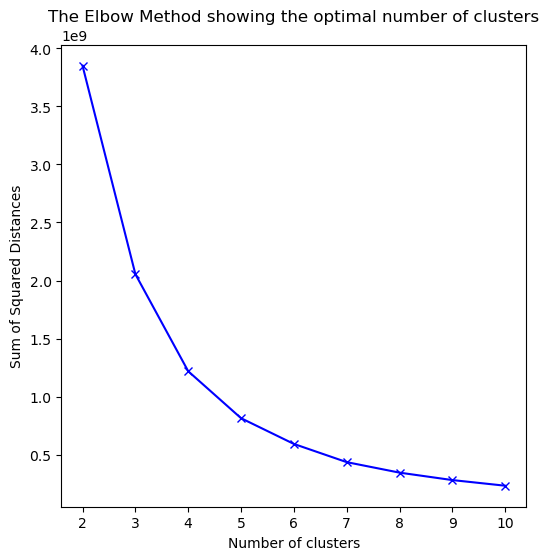

In [17]:
import matplotlib.pyplot as plt
# plot the SSDs for each n_clusters
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

for num_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()


For n_clusters = 2 The average silhouette_score is : 0.578280366644975
For n_clusters = 3 The average silhouette_score is : 0.5282077749951735
For n_clusters = 4 The average silhouette_score is : 0.5305787987938964
For n_clusters = 5 The average silhouette_score is : 0.5308554448567586
For n_clusters = 6 The average silhouette_score is : 0.5227245721854705
For n_clusters = 7 The average silhouette_score is : 0.5189314867908318
For n_clusters = 8 The average silhouette_score is : 0.5131054231005723
For n_clusters = 9 The average silhouette_score is : 0.505746416806422
For n_clusters = 10 The average silhouette_score is : 0.5047722029154927


In [20]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20, max_iter=300)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 0 4 ... 2 1 0]


# Insights

In [21]:
df_ori["Clus_KM"] = labels
df_ori.head()

customer_id  gender               job_title job_industry_category  \
0            1  Female     Executive Secretary                Health   
1            2    Male  Administrative Officer    Financial Services   
2            4    Male      Recruiting Manager                    IT   
3            5  Female           Senior Editor                    IT   
4            6    Male           Senior Editor                Retail   

      wealth_segment owns_car  tenure age_class state  property_valuation  \
0      Mass Customer      Yes      11     70-79   NSW                  10   
1      Mass Customer      Yes      16     40-49   NSW                  10   
2      Mass Customer       No       7     60-69   QLD                   9   
3  Affluent Customer      Yes       8     40-49   NSW                   4   
4     High Net Worth      Yes      13     50-59   VIC                   9   

   recency  frequency  monetary  Clus_KM  
0        7         11   3018.09        2  
1      128          3   2226.26        0  
2      195          2    220.57        4  
3       16          6   2394.94        0  
4       64          5   3946.55        2

In [22]:
df_ori.to_csv('df_segmented.csv', index=False)

In [23]:
df_cluster = df_ori.groupby('Clus_KM').agg({
    'customer_id': 'size',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index().rename(columns={'customer_id': 'customer_count'})

df_cluster

Clus_KM  customer_count    recency  frequency     monetary
0        0            1105  62.109502   5.020814  2300.959882
1        1             580  44.036207   7.462069  5099.628793
2        2             885  54.449718   6.216949  3596.254181
3        3             195  34.630769   9.148718  7325.781744
4        4             721  91.981969   3.353675   959.417254

In [24]:
df_cluster.sort_values('recency', ascending=True)

Clus_KM  customer_count    recency  frequency     monetary
3        3             195  34.630769   9.148718  7325.781744
1        1             580  44.036207   7.462069  5099.628793
2        2             885  54.449718   6.216949  3596.254181
0        0            1105  62.109502   5.020814  2300.959882
4        4             721  91.981969   3.353675   959.417254

In [25]:
df_cluster.sort_values('frequency', ascending=False)

Clus_KM  customer_count    recency  frequency     monetary
3        3             195  34.630769   9.148718  7325.781744
1        1             580  44.036207   7.462069  5099.628793
2        2             885  54.449718   6.216949  3596.254181
0        0            1105  62.109502   5.020814  2300.959882
4        4             721  91.981969   3.353675   959.417254

In [26]:
df_cluster.sort_values('monetary', ascending=False)

Clus_KM  customer_count    recency  frequency     monetary
3        3             195  34.630769   9.148718  7325.781744
1        1             580  44.036207   7.462069  5099.628793
2        2             885  54.449718   6.216949  3596.254181
0        0            1105  62.109502   5.020814  2300.959882
4        4             721  91.981969   3.353675   959.417254

| Cluster           | Description           |
| ----------------- | --------------------- |
| 3  | highest monetary value and frequency, indicating a group of high-spending and frequent customers who have interacted recently.|
| 2                 | consists of relatively high-spending customers who interact fairly frequently, but their recency is slightly lower compared to Segment 3                    |
| 0                 | represents a larger group of customers who have spent less, interacted less frequently, and their interactions are not as recent.      |
| 4                 | consists of customers with lower monetary value, lower frequency, and less recent interactions.     |
| 1                 | represents customers with the lowest recency, frequency, and monetary value.      |


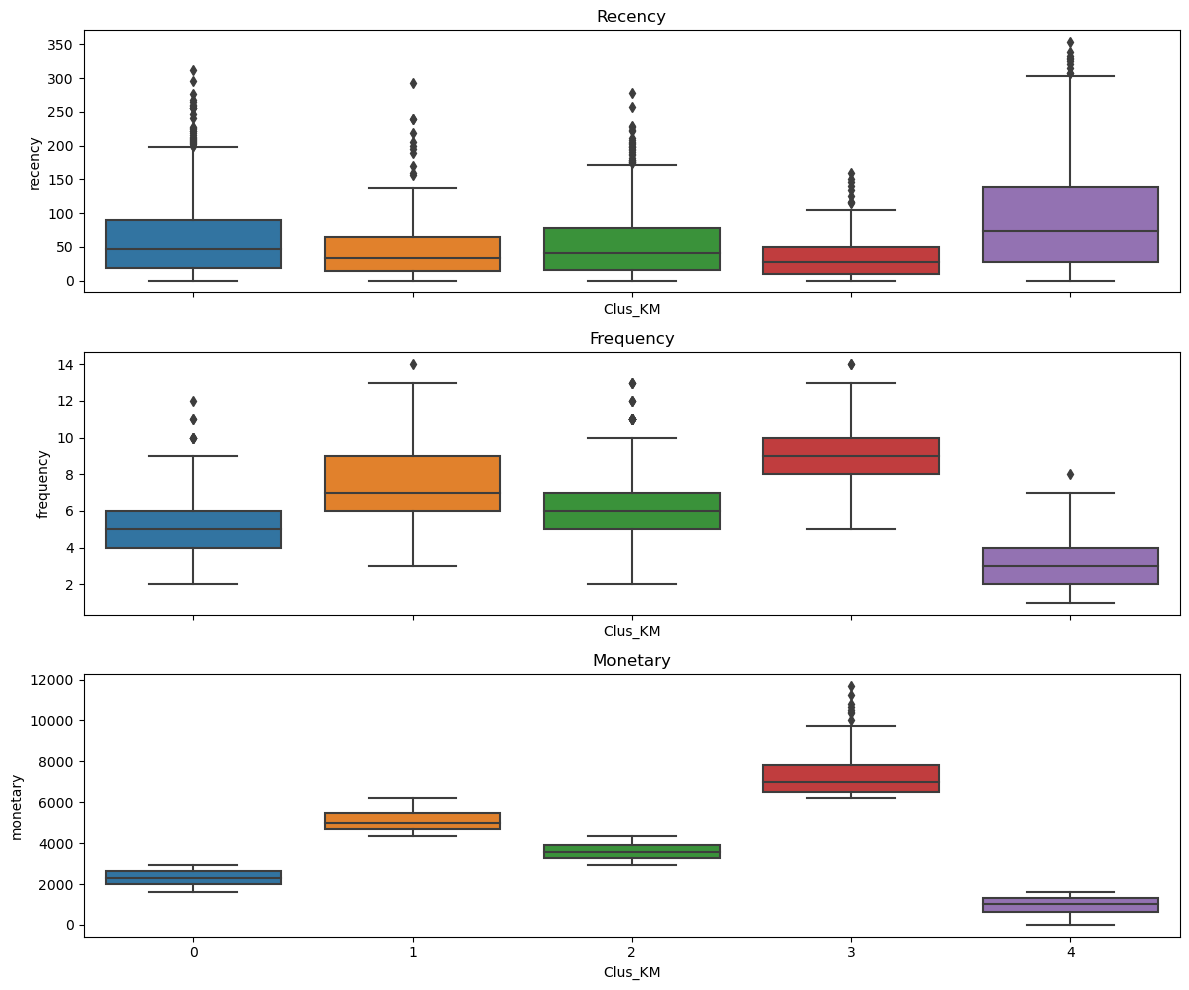

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 10))

sns.boxplot(x='Clus_KM', y='recency', data=df_ori, ax=axs[0])
axs[0].set_title('Recency')

sns.boxplot(x='Clus_KM', y='frequency', data=df_ori, ax=axs[1])
axs[1].set_title('Frequency')

sns.boxplot(x='Clus_KM', y='monetary', data=df_ori, ax=axs[2])
axs[2].set_title('Monetary')

plt.tight_layout()
plt.show()


[Text(0.5, 1.0, 'Monetary VS Recency')]

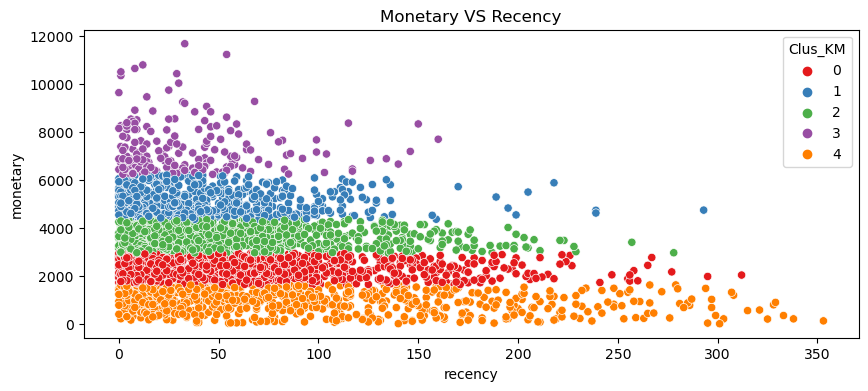

In [28]:
# Set up the figure and axes
plt.figure(figsize=(10, 4))
sns.scatterplot(x='recency', y='monetary', data=df_ori, hue='Clus_KM', palette='Set1').set(title='Monetary VS Recency')

[Text(0.5, 1.0, 'Monetary VS Frequency')]

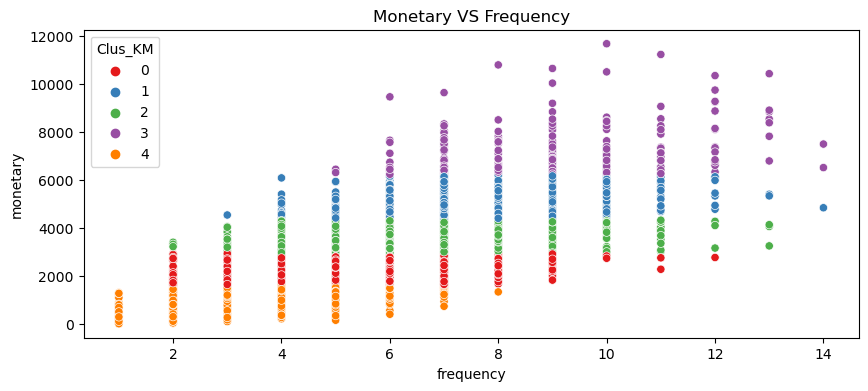

In [29]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='frequency', y='monetary', data=df_ori, hue='Clus_KM', palette='Set1').set(title='Monetary VS Frequency')

[Text(0.5, 1.0, 'Recency VS Frequency')]

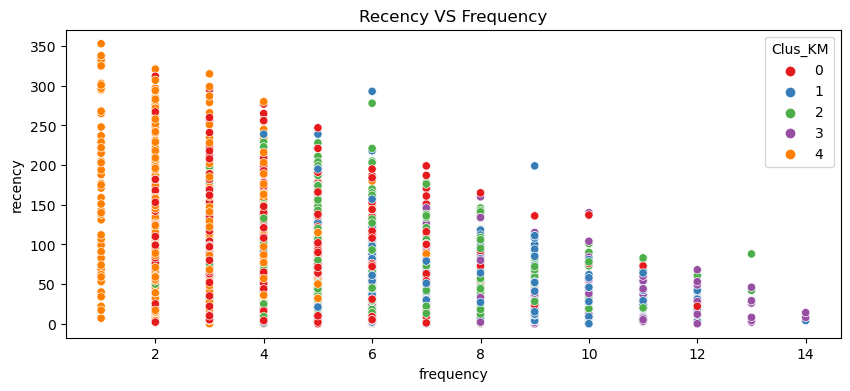

In [30]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x='frequency', y='recency', data=df_ori, hue='Clus_KM', palette='Set1').set(title='Recency VS Frequency')

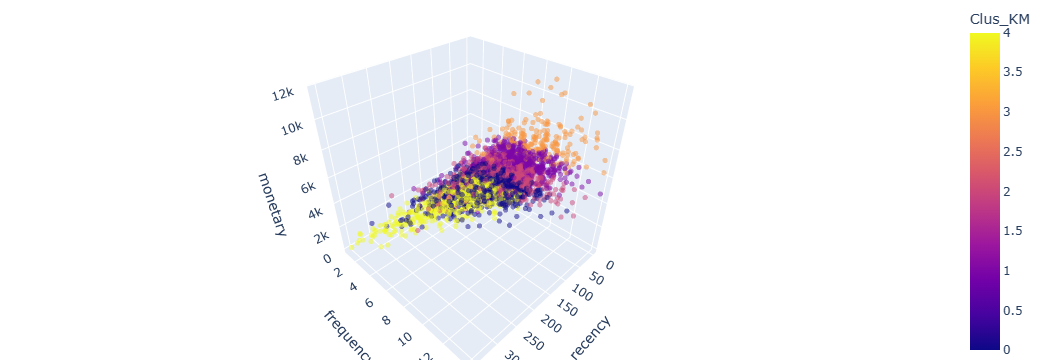

In [31]:
import plotly.express as px

fig = px.scatter_3d(df_ori, x='recency', y='frequency', z='monetary',
                    color='Clus_KM', opacity=0.5)

# Reduce the size of points
fig.update_traces(marker=dict(size=3))

# Update layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()

In [54]:
df_best = df_ori[df_ori['Clus_KM'] == 4].copy()

In [55]:
df_best.columns

Index(['customer_id', 'gender', 'job_title', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age_class', 'state',
       'property_valuation', 'recency', 'frequency', 'monetary', 'Clus_KM'],
      dtype='object')

In [56]:
def calculate_percentage_profit(data, column_name):
    grouped_data = data.groupby([column_name])[['monetary']].sum().reset_index()
    total = grouped_data['monetary'].sum()
    grouped_data['percentage'] = round((grouped_data['monetary'] / total) * 100, 2)
    grouped_data.columns = [column_name, 'profit', 'percentage']
    grouped_data.sort_values('percentage', ascending=False, inplace=True)
    grouped_data.reset_index(drop=True, inplace=True)
    return grouped_data

def calculate_percentage_count(data, column_name):
    grouped_data = data.groupby([column_name])[['customer_id']].count().reset_index()
    total = data.shape[0]
    grouped_data['percentage'] = round((grouped_data['customer_id'] / total) * 100, 2)
    grouped_data.columns = [column_name, 'count', 'percentage']
    grouped_data.sort_values('percentage', ascending=False, inplace=True)
    grouped_data.reset_index(drop=True, inplace=True)
    return grouped_data

def plot_percentage_data(data, column_name):
    # Calculate percentage
    grouped_data = data.groupby([column_name])[['customer_id']].count().reset_index()
    total = grouped_data['customer_id'].sum()
    grouped_data['percentage'] = round((grouped_data['customer_id'] / total) * 100, 2)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='percentage', data=grouped_data)
    plt.title('Percentage Distribution by ' + column_name)
    plt.show()

In [57]:
column_interested = 'gender'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

gender  count  percentage
0  Female    373       51.73
1    Male    348       48.27

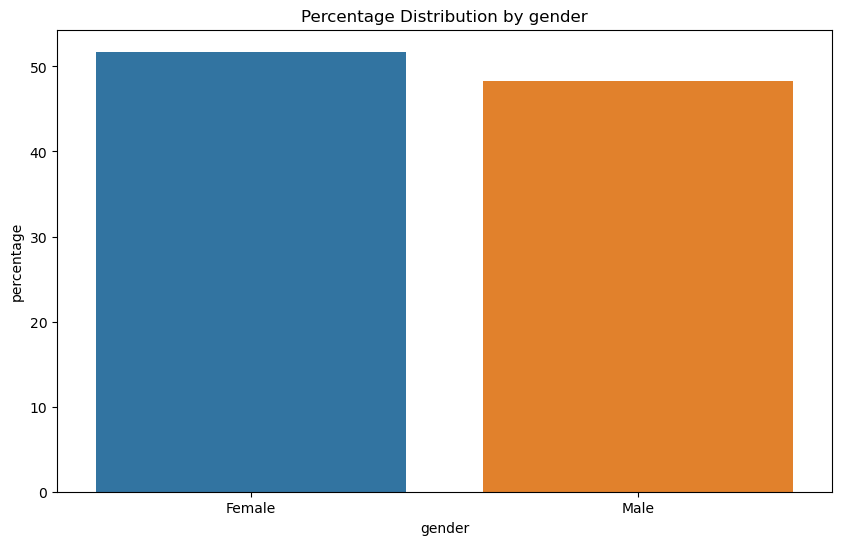

In [58]:
column_interested = 'gender'
plot_percentage_data(df_best, column_interested)

In [59]:
column_interested = 'job_title'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

job_title  count  percentage
0                        Senior Developer     13        1.80
1                                VP Sales     13        1.80
2                        Registered Nurse     13        1.80
3    Business Systems Development Analyst     12        1.66
4                        Dental Hygienist     12        1.66
..                                    ...    ...         ...
165                  Office Assistant III      1        0.14
166                          Engineer III      1        0.14
167                            Engineer I      1        0.14
168                 Software Engineer III      1        0.14
169                      Web Developer IV      1        0.14

[170 rows x 3 columns]

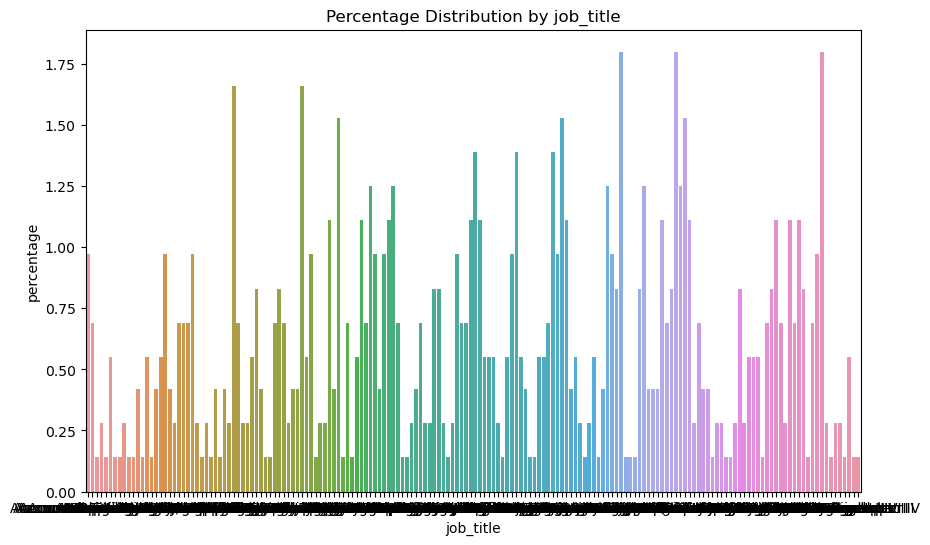

In [60]:
column_interested = 'job_title'
plot_percentage_data(df_best, column_interested)

In [61]:
column_interested = 'job_industry_category'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

job_industry_category  count  percentage
0    Financial Services    174       24.13
1         Manufacturing    165       22.88
2                Health    138       19.14
3                Retail     79       10.96
4              Property     51        7.07
5                    IT     42        5.83
6         Entertainment     33        4.58
7           Argiculture     21        2.91
8    Telecommunications     18        2.50

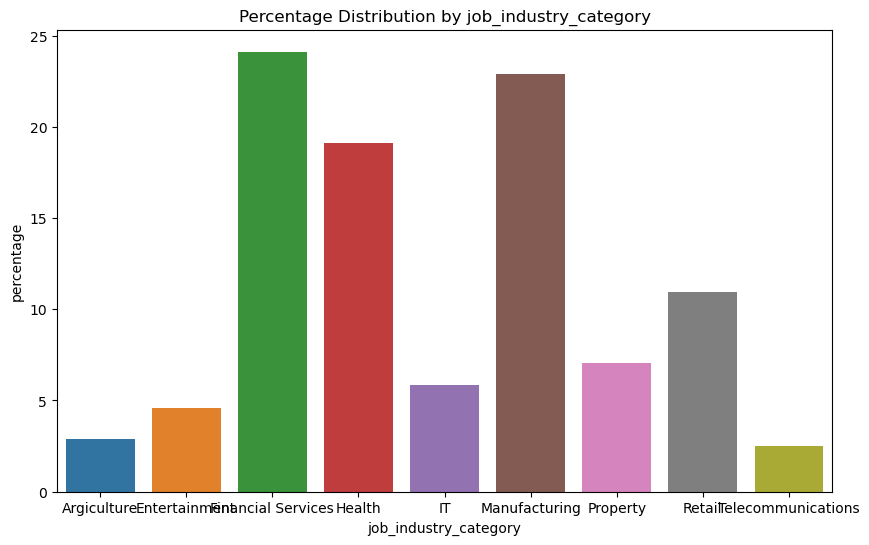

In [62]:
column_interested = 'job_industry_category'
plot_percentage_data(df_best, column_interested)

In [63]:
column_interested = 'wealth_segment'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

wealth_segment  count  percentage
0      Mass Customer    366       50.76
1  Affluent Customer    183       25.38
2     High Net Worth    172       23.86

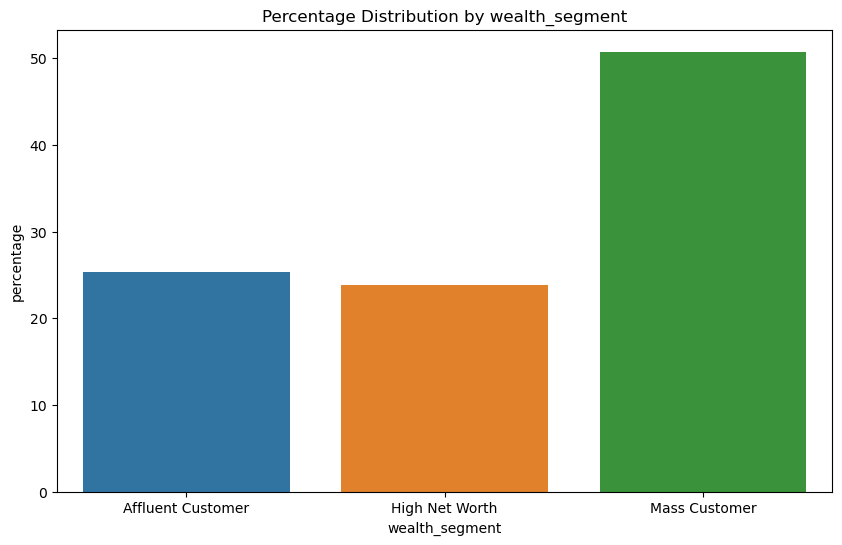

In [64]:
column_interested = 'wealth_segment'
plot_percentage_data(df_best, column_interested)

In [65]:
column_interested = 'owns_car'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

owns_car  count  percentage
0      Yes    362       50.21
1       No    359       49.79

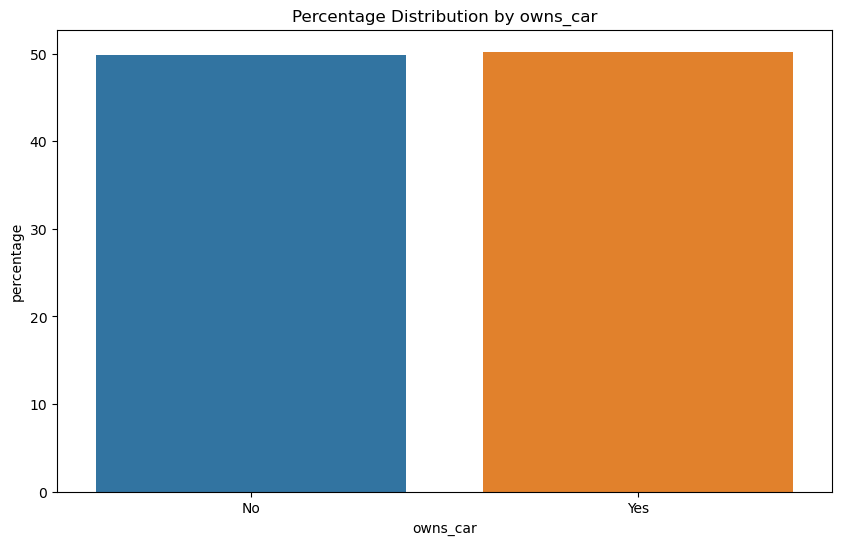

In [66]:
column_interested = 'owns_car'
plot_percentage_data(df_best, column_interested)

In [67]:
column_interested = 'tenure'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

tenure  count  percentage
0        5     49        6.80
1       14     46        6.38
2       18     45        6.24
3        8     45        6.24
4       11     42        5.83
5        4     40        5.55
6       16     40        5.55
7       10     37        5.13
8       13     34        4.72
9        6     33        4.58
10      17     33        4.58
11       9     33        4.58
12       1     31        4.30
13      12     30        4.16
14       7     29        4.02
15       3     29        4.02
16      15     28        3.88
17       2     26        3.61
18      19     26        3.61
19      20     21        2.91
20      22     16        2.22
21      21      8        1.11

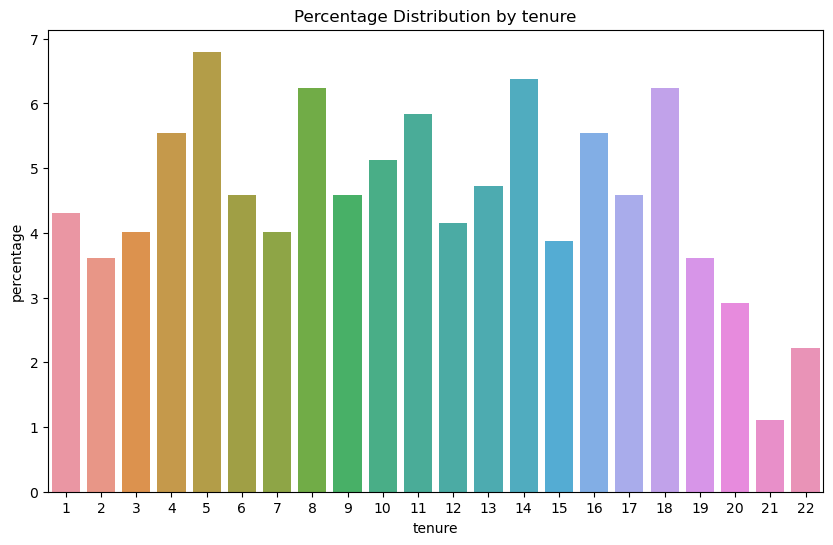

In [68]:
column_interested = 'tenure'
plot_percentage_data(df_best, column_interested)

In [69]:
column_interested = 'age_class'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

age_class  count  percentage
0     40-49    231       32.04
1     50-59    148       20.53
2     30-39    146       20.25
3     60-69    109       15.12
4     20-29     80       11.10
5     70-79      6        0.83
6     80-89      1        0.14

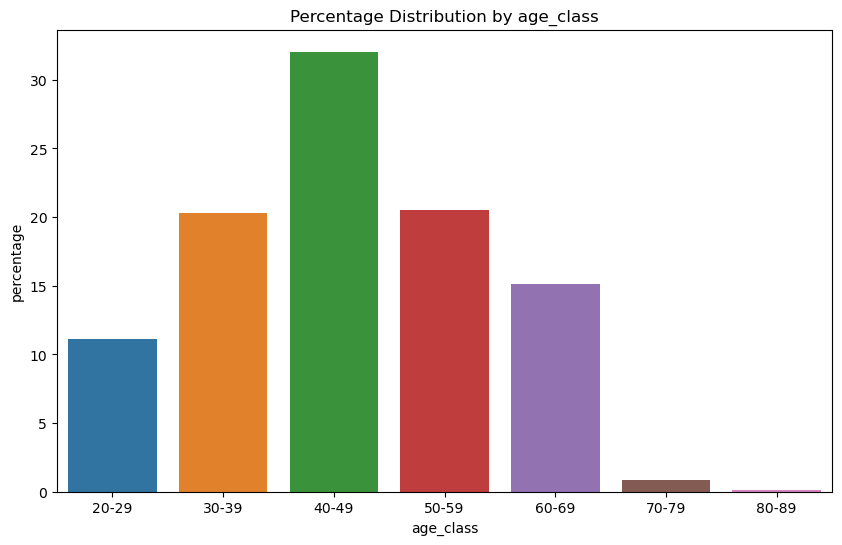

In [70]:
column_interested = 'age_class'
plot_percentage_data(df_best, column_interested)

In [71]:
column_interested = 'state'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

state  count  percentage
0   NSW    398       55.20
1   VIC    177       24.55
2   QLD    146       20.25

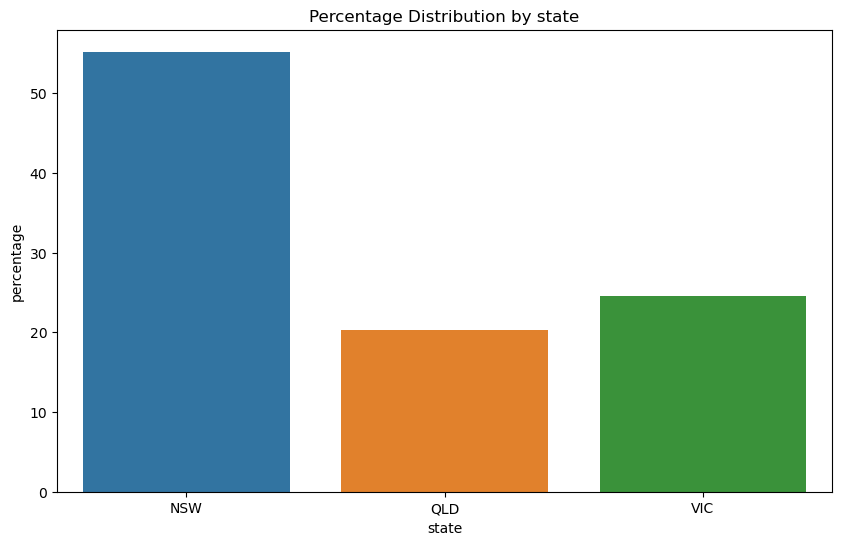

In [72]:
column_interested = 'state'
plot_percentage_data(df_best, column_interested)

In [73]:
column_interested = 'property_valuation'
best_result = calculate_percentage_count(df_best,column_interested)
best_result

property_valuation  count  percentage
0                    9    124       17.20
1                   10    112       15.53
2                    8    108       14.98
3                    7     79       10.96
4                   11     57        7.91
5                    5     43        5.96
6                    6     40        5.55
7                    3     36        4.99
8                   12     36        4.99
9                    4     34        4.72
10                   1     26        3.61
11                   2     26        3.61

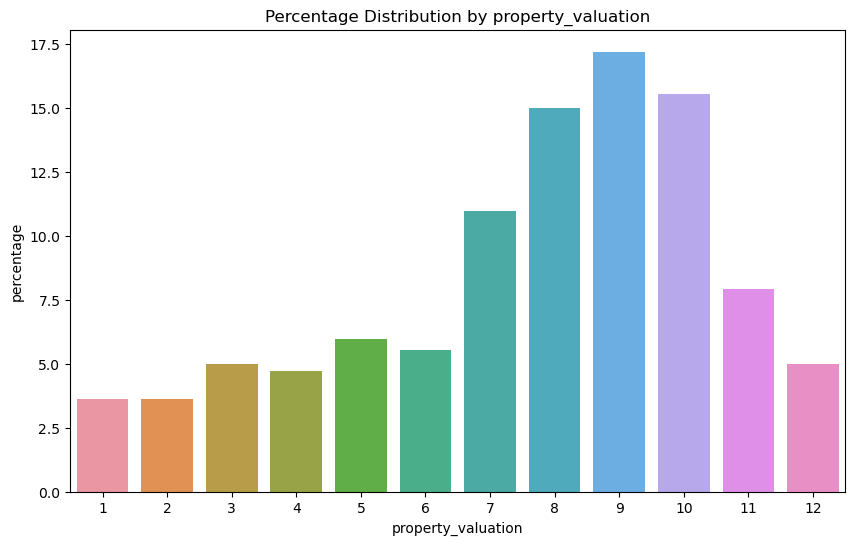

In [74]:
column_interested = 'property_valuation'
plot_percentage_data(df_best, column_interested)

In [75]:
df_best.corr()

customer_id    tenure  property_valuation   recency  \
customer_id            1.000000 -0.018099           -0.045149 -0.034943   
tenure                -0.018099  1.000000            0.025537 -0.013893   
property_valuation    -0.045149  0.025537            1.000000  0.040539   
recency               -0.034943 -0.013893            0.040539  1.000000   
frequency              0.004013 -0.029854            0.027120 -0.378218   
monetary               0.012566 -0.027650           -0.021123 -0.225566   
Clus_KM                     NaN       NaN                 NaN       NaN   

                    frequency  monetary  Clus_KM  
customer_id          0.004013  0.012566      NaN  
tenure              -0.029854 -0.027650      NaN  
property_valuation   0.027120 -0.021123      NaN  
recency             -0.378218 -0.225566      NaN  
frequency            1.000000  0.471907      NaN  
monetary             0.471907  1.000000      NaN  
Clus_KM                   NaN       NaN      NaN

# Cluster Analysis

- The **Best** customer segment demonstrates a gender balance, with females comprising **47.18%** and males comprising **52.82%** of the segment.
- **Best** customers exhibit diverse job titles, with no prominent recurring job category. The top job titles, such as **Information Systems Manager** and **Recruiting Manager**, each account for **6.15%** and **4.62%** of the customer segment respectively.
- Approximately **53.33%** of the **Best** customers fall under the **Mass Customer** wealth segment category.
- The majority of **Best** customers are employed in industries such as **Financial Services, Manufacturing** and **Health** collectively making up **67.69%** of the segment.
- Car ownership among **Best** customers is evenly distributed, showing no significant discernible pattern.
- The prevalent age range among customers in the **Best** segment is **40-49**, constituting **28.21%** of the total.
- A substantial **54.36%** of **Best** customers are located in the **NSW** region.
- The prevalent **property valuation** among customers in the **Best** segment is **8-10** constituting **52.3%**.